<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [4]:
 from sklearn.model_selection import train_test_split

In [5]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_targets, test_size=0.2, random_state=42)

In [6]:
print(x_train.shape, x_val.shape)

(323, 13) (81, 13)


In [7]:
print(test_data.shape, test_targets.shape)

(102, 13) (102,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


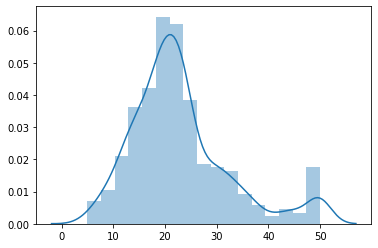

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(y_train)

가격을 로그로 전환해서 예측해 본다. 이경우 원래 가격이 낮을 수록 오차에 대한 손실이 크게 나타난다.

In [9]:
import numpy as np

y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

(323,)


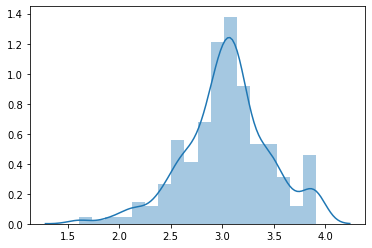

In [10]:
sns.distplot(y_train_log)
print(y_train_log.shape)

In [11]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

# Test data도 정규화를 해준다

x_val -= mean
x_val /= std

test_data -= mean
test_data /= std

In [12]:
from keras.models import Model
from keras import layers
from keras.layers import Dropout # Drop0ut을 사용한다.
from keras import Input
from keras import regularizers # 규제를 사용한다.
import tensorflow as tf

In [13]:
input_x = Input(shape=(13,)) # shape=(input_dim,)
middle_x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0))(input_x)
# middle_x = layers.Dropout(0.5)(middle_x)
middle_x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0))(middle_x)
output_y = layers.Dense(1, )(middle_x)

class Tensem():
  def model(input_x, output_y):
    model = Model(input_x, output_y)
    return model


In [27]:
modelx = Tensem.model(input_x, output_y)

In [14]:
model1 = Tensem.model(input_x, output_y)

In [29]:
type(model1)

keras.engine.training.Model

In [25]:
type(modelx)

keras.engine.training.Model

In [30]:
model1 == modelx

False

In [26]:
modelx.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


모델의 기본구조이다

In [19]:
input_x = Input(shape=(13,)) # shape=(input_dim,)
middle_x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0))(input_x)
# middle_x = layers.Dropout(0.5)(middle_x)
middle_x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0))(middle_x)
output_y = layers.Dense(1, )(middle_x)
model = Model(input_x, output_y)


In [20]:
type(model)

keras.engine.training.Model

model.prediction에서 log 적용과 비적용을 구분하기 위해서 로그를 활용할 경우 model1 = Model(input_x, output_y)로 구분해 준다

In [18]:
#model1 = Model(input_x, output_y)

epochs_num = 100
model1.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), loss='mse', metrics=['mae'])

# y_train_log를 fitting에 사용하였다

history1 = model1.fit(x_train, y_train_log, validation_data=(x_val, y_val_log), epochs=epochs_num, verbose=0)
model1.predict(x_val[1].reshape(1,13))[0]

array([3.2320755], dtype=float32)

In [19]:
history1_dic = history1.history
history1_dic.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

In [20]:
print("예측오차 :", history1.history['val_mae'][-1])
print("손실 :", history1.history['val_loss'][-1])

# y_train을 사용하는 것보다 y_train_log를 사용하면 예측오차는 작아진다. 그러면 예측품질이 좋아 진 것인가?

예측오차 : 0.1960679292678833
손실 : 0.06339404860764374


In [21]:
y_val_log_predicted = model1.predict(x_val)

# 모델이 로그로 학습되었으므로 x_val을 넣으면 y_val이 아니라 y_val_log_predict로 값을 가지게 된다

In [24]:
y_val_predicted_from_log = np.exp(y_val_log_predicted)

In [22]:
import matplotlib.pyplot as plt

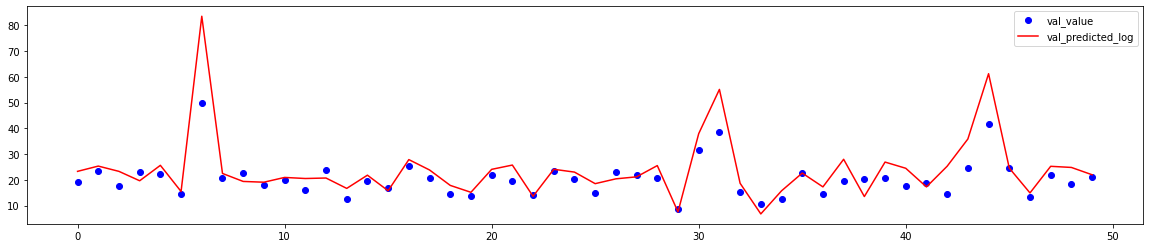

In [25]:
plt.rcParams["figure.figsize"] = (20,4)

plt.plot(y_val[:50], 'bo', label='val_value')
plt.plot(y_val_predicted_from_log[:50], 'r', label='val_predicted_log')
plt.legend()
plt.show()

100.00000000000004

로그로 치환하지 않은 모델은 그냥 model2로 정의한다.

In [26]:
#model2 = Model(input_x, output_y)

model2 = Tensem.model(input_x, output_y)

epochs_num = 100
model2.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), loss='mse', metrics=['mae'])

history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs_num, verbose=0)
model2.predict(x_val[1].reshape(1,13))[0]

array([27.866686], dtype=float32)

In [27]:
history2.history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

In [28]:
print("예측오차 :", history2.history['val_mae'][-1])
print("손실 :", history2.history['val_loss'][-1])

예측오차 : 2.549008846282959
손실 : 14.041771759221584


In [29]:
y_val_predicted = model2.predict(x_val)

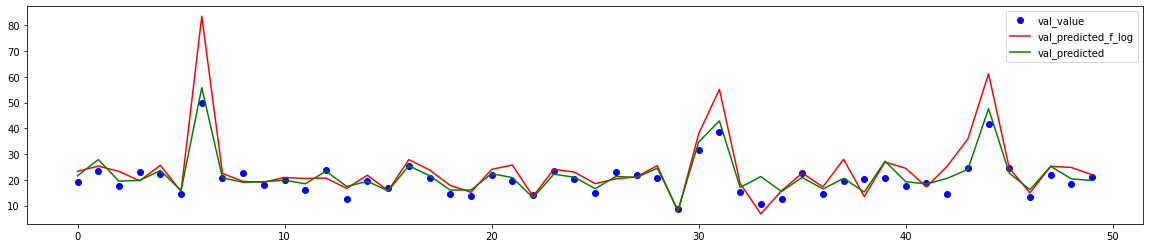

In [30]:
plt.rcParams["figure.figsize"] = (20,4)

plt.plot(y_val[:50], 'bo', label='val_value')
plt.plot(y_val_predicted_from_log[:50], 'r', label='val_predicted_f_log')
plt.plot(y_val_predicted[:50], 'g', label='val_predicted')
plt.legend()
plt.show()

In [31]:
print(np.mean(np.absolute(y_val.reshape(-1,1)- y_val_predicted)))
print(np.mean(np.absolute(y_val.reshape(-1,1)- y_val_predicted_from_log)))

# 전체적인 평가 결과는 log를 사용하지 않은 편이 좋다.

2.5490086826277367
4.777184804280599


In [32]:
y_val1 = y_val.reshape(-1,1)
len(y_val1)

81

In [33]:
y_mean=np.mean(y_train)
print(y_mean)

22.86594427244582


모델을 구분하여 사용하기 위해서 나누어 분석해 본다
주택가격이 평균 이상과 이하로 나눌 경우, log를 사용하면 평균이하에서 평가결과가 우수하고, log를 사용하지 않은 경우에는 평균이상에서 평가결과가 좋다

In [34]:
# 이것은 log를 사용하지 않은 모델이다.
# 결과를 보면 y_val[i]가 평균보다 높을 경우에 손실이 작다

sqe_H = 0
sqe_L = 0
cH = 0
cL = 0

for i in range(len(y_val1)):
  if y_val1[i] >= y_mean:
    sqe = np.square(y_val1[i] - y_val_predicted[i])
    sqe_H += sqe
    cH += 1
  else:
    sqe = np.square(y_val1[i] - y_val_predicted[i])
    sqe_L += sqe
    cL += 1

print("mse_high :", sqe_H/cH)
print("mse_low :", sqe_L/cL)


mse_high : [14.70800605]
mse_low : [13.79334543]


In [35]:
# 이것은 log를 사용한 모델이다.
# 결과를 보면 y_val[i]가 평균보다 낮을 경우에 손실이 작다

sqe_H = 0
sqe_L = 0
cH = 0
cL = 0

for i in range(len(y_val1)):
  if y_val1[i] >= y_mean:
    sqe = np.square(y_val1[i] - y_val_predicted_from_log[i])
    sqe_H += sqe
    cH += 1
  else:
    sqe = np.square(y_val1[i] - y_val_predicted_from_log[i])
    sqe_L += sqe
    cL += 1

print("mse_high_log :", sqe_H/cH)
print("mse_low_log :", sqe_L/cL)

mse_high_log : [147.2420168]
mse_low_log : [19.72519344]


In [46]:
from keras import backend as K

# 메모리 해제
K.clear_session()

두개의 모델을 운영하는 방안이다. 앙상블이라고 보기는 어려운 평균치보다 높을 경우는 비 log 모델을 평균치 보다 낮을 경우 log 모델을 사용하는 방법이다.

In [61]:
y_ps = []
price=0
mean_y_train = np.mean(y_train)
for input, output in zip(x_val, y_val):
  if output >= mean_y_train:
    history1 = model1.fit(x_train, y_train_log, validation_data=(x_val, y_val_log), epochs=epochs_num, verbose=0)
    price = model1.predict(input.reshape(1,13))[0][0]
    price = np.exp(price)
    print(price)
  if output < mean_y_train:
    history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs_num, verbose=0)
    price = model2.predict(input.reshape(1,13))[0][0]
    print(price)
  #y_ps.append(price)

21.184996
284.05884
19.069393
55.022434
20.713045
15.424173
10.015689
20.581438
17.410143
17.395248
22.546331
16.54678
19.970192
16.407404
21.964136
16.05239
31.76168
21.291342
14.529778
12.15486
20.573835
18.626926
9.873445
118.7581
19.485079
14.72778
26.448702
18.623968
24.318485
8.575354
110.5727
9.880133
15.500164
21.443172
12.045857
17.737751
16.160818
22.152473
16.760862


KeyboardInterrupt: ignored

In [ ]:
np.sum(np.absolute(y_ps - y_val))/81

2.5484140761104634

Test_data에 적용한 값이다.

In [41]:
y_ps = []
price=0
mean_y_train = np.mean(y_train)
for input, output in zip(test_data, test_targets):
  if output >= mean_y_train:
    history1 = model1.fit(x_train, y_train_log, validation_data=(x_val, y_val_log), epochs=epochs_num, verbose=0)
    price = model1.predict(input.reshape(1,13))[0][0]
    price = np.exp(price)
  if output < mean_y_train:
    history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs_num, verbose=0)
    price = model2.predict(input.reshape(1,13))[0][0]
  y_ps.append(price)

In [42]:
np.sum(np.absolute(y_ps - test_targets))/102

70.57168146939401

In [50]:
y_val[1]

23.3

In [60]:
history1 = model1.fit(x_train, y_train_log, validation_data=(x_val, y_val_log), epochs=epochs_num, verbose=0)
a = model1.predict(x_val[1].reshape(1,13))[0]
a = np.exp(a)
print(a)

[30.28405]


In [48]:
history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs_num, verbose=0)
model2.predict(x_val[1].reshape(1,13))[0]

array([32.601715], dtype=float32)

In [ ]:
y_val[2]

17.5

In [ ]:
np.mean(y_val)

20.517283950617283

1) Per capita crime rate_범죄율 2) Proportion of residential land zoned for lots over 25,000 square feet_주거지역 비율. 3) Proportion of non-retail business acres per town_비상업지구. 4) Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)_강에 근접여부  5) Nitric oxides concentration (parts per 10 million)_대기오염 6) Average number of rooms per dwelling_방개수 7) Proportion of owner-occupied units built prior to 1940_노후화 8) Weighted distances to five Boston employment centres_직장거리 9) Index of accessibility to radial highways_도로근접성 10) Full-value property-tax rate per $10,000_재산세율 11) Pupil-teacher ratio by town_교육편의성 12) 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town_흑인비율 13) % lower status of the population_하위계층비율

In [ ]:
df_x.loc[0:5,[0,1,2,3,4,5]].values   # DF의 특정 부분을 선택해서 numpy로 전환하는 방법

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00],
       [2.83920e-01, 0.00000e+00, 7.38000e+00, 0.00000e+00, 4.93000e-01,
        5.70800e+00]])

In [ ]:
df_x.loc[0:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74


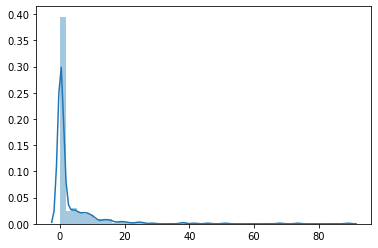

In [ ]:
sns.distplot(df_x.loc[:,[0]])

In [ ]:
import numpy as np

In [ ]:
print(np.log(100) - np.log(80))
print(np.log(80) - np.log(60))
print(np.log(60) - np.log(40))
print(np.log(40) - np.log(20))
print(np.log(20) - np.log(0))

0.2231435513142106
0.2876820724517808
0.40546510810816416
0.6931471805599454
inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [ ]:
def abc():
  x = "high"
  return x

In [ ]:
g = abc()

In [ ]:
print(g)

high


In [ ]:
z = abc()
print(z)

high


In [ ]:
g == z

True